DATA DESCRIPTION

id  = client company identifier


**Import Packages**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',444)

**LOAD DATASETS**
Load the client and price data into unique dataframes, then work with them in Python

In [35]:
#Load Datasets
client_data = pd.read_csv("~/Downloads/client_data.csv")
price_data = pd.read_csv("~/Downloads/price_data.csv")

In [36]:
client_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [37]:
#Get the number of rows and columns present in client data
client_data.shape

(14606, 26)

In [38]:
price_data.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [39]:
price_data.shape

(193002, 8)

## DESCRIPTIVE STATISTICS OF DATA

### Data Types

Understanding the datatypes for each attribute in the data is very important, it gives information about the possible and like types of data preprocessing, transformation and engineering that may be required for analysis.

In [7]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


There are 26 columns in the client's data and 8 columns in the price's data

However, there  are instances in the client data that says sales channels is "MISING"
Change this to NAN, to be able to effectively work with it for what it is

In [40]:
client_data['channel_sales'] = client_data['channel_sales'].replace('MISSING', np.nan)


STATISTICAL SUMMARY

In [9]:
#get the measures of central tendency and more statistical information
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [41]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


#### DATA TYPES

In [42]:
client_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

The pandas function above does not go into details about whether a column contains  a categorical or numerical variable
Write a function that that clearly determines the category of each column

In [12]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [13]:
print_categories(client_data)

id :  Text (Unique)
channel_sales :  Categorical
cons_12m :  Numerical
cons_gas_12m :  Numerical
cons_last_month :  Numerical
date_activ :  Categorical
date_end :  Categorical
date_modif_prod :  Categorical
date_renewal :  Categorical
forecast_cons_12m :  Numerical
forecast_cons_year :  Numerical
forecast_discount_energy :  Numerical
forecast_meter_rent_12m :  Numerical
forecast_price_energy_off_peak :  Numerical
forecast_price_energy_peak :  Numerical
forecast_price_pow_off_peak :  Numerical
has_gas :  Categorical
imp_cons :  Numerical
margin_gross_pow_ele :  Numerical
margin_net_pow_ele :  Numerical
nb_prod_act :  Numerical
net_margin :  Numerical
num_years_antig :  Numerical
origin_up :  Categorical
pow_max :  Numerical
churn :  Numerical


In [14]:
print_categories(price_data)

id :  Categorical
price_date :  Categorical
price_off_peak_var :  Numerical
price_peak_var :  Numerical
price_mid_peak_var :  Numerical
price_off_peak_fix :  Numerical
price_peak_fix :  Numerical
price_mid_peak_fix :  Numerical


In [22]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [23]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

#### VISUAL EXPLORATORY DATA ANALYSIS

## Client Data

In [46]:
client_data.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


#### CHURN ANALYSIS

### Distribution of churn and non-churn customers

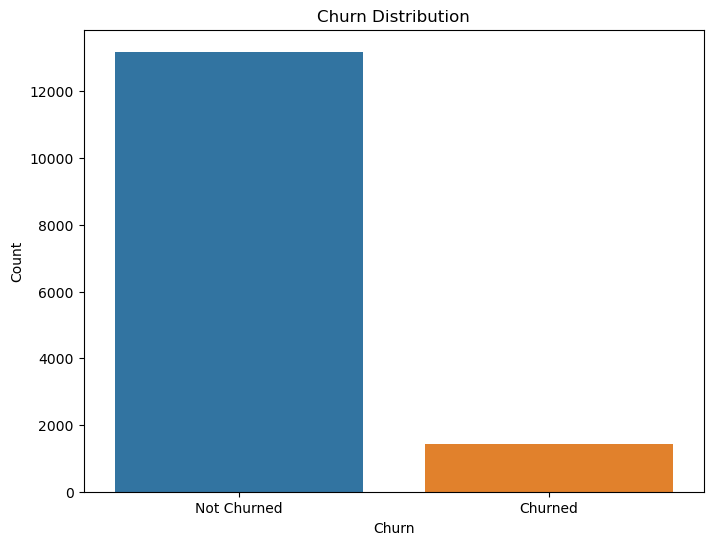

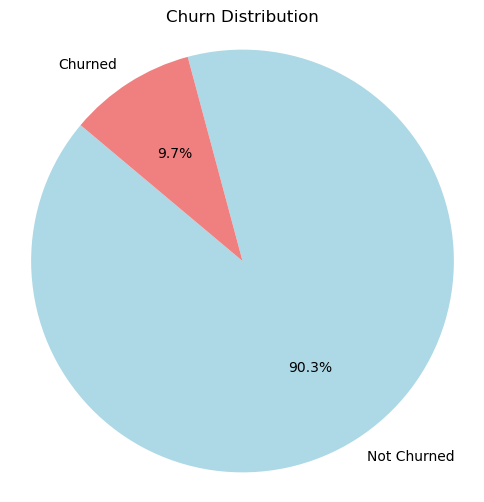

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=client_data, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


# Calculate the churn counts
churn_counts = client_data['churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


Code above shows churn distribution both as count and percentage proportion. There is 9.7% percent churn rate

## CUSTOMER LIFETIME ANALYSIS

## Customer Lifetime distribution by churn

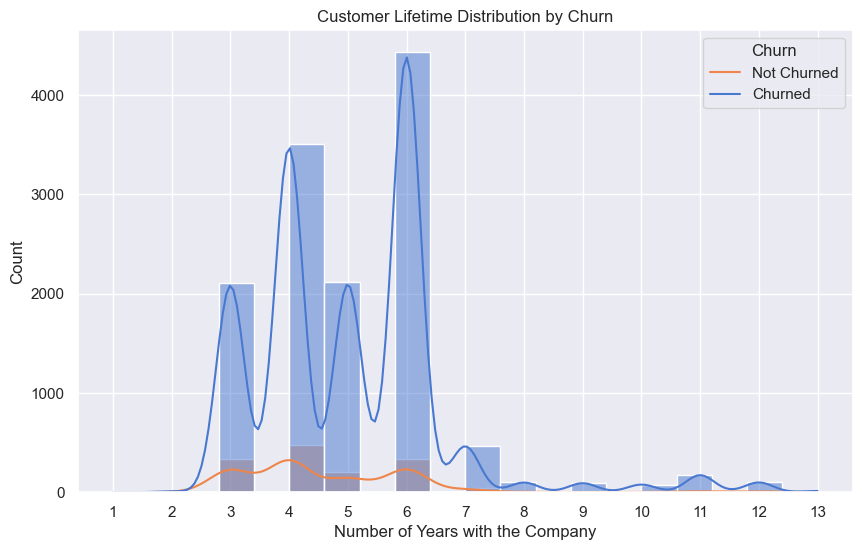

In [33]:
# Create histograms for customer lifetime
plt.figure(figsize=(10, 6))
sns.histplot(data=client_data, x='num_years_antig', hue='churn', kde=True, bins=20)
plt.title('Customer Lifetime Distribution by Churn')
plt.xlabel('Number of Years with the Company')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(range(1, 14))  # Set x-axis ticks from 1 to 20

plt.show()


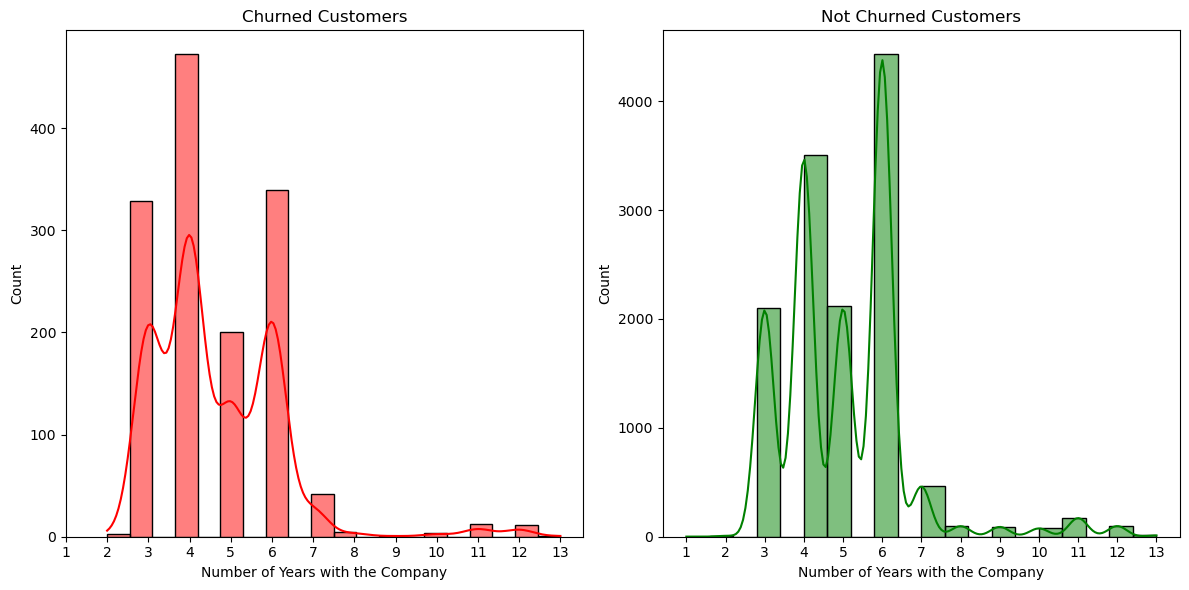

In [26]:
#Let's take a look at what this looks like for each category of customers

# Filter the data for churned and not churned customers
churned_customers = client_data[client_data['churn'] == 1]
not_churned_customers = client_data[client_data['churn'] == 0]

# Create separate histograms for churned and not churned customers
plt.figure(figsize=(12, 6))

# Histogram for churned customers
plt.subplot(1, 2, 1)
sns.histplot(data=churned_customers, x='num_years_antig', kde=True, bins=20, color='red')
plt.title('Churned Customers')
plt.xlabel('Number of Years with the Company')
plt.ylabel('Count')
plt.xticks(range(1, 14))  # Set x-axis ticks from 1 to 20

# Histogram for not churned customers
plt.subplot(1, 2, 2)
sns.histplot(data=not_churned_customers, x='num_years_antig', kde=True, bins=20, color='green')
plt.title('Not Churned Customers')
plt.xlabel('Number of Years with the Company')
plt.ylabel('Count')
plt.xticks(range(1, 14))  # Set x-axis ticks from 1 to 20

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


Here is a visual distribution of the number of years customers have spent with a company showing multiple peaks and variations at specific years.

what are the potential insights and interpretations that can be drawn from this?

* The most frequent value for the number of years customers have been with company is 6 for Not churned customers and 4 for churned customers 
* All customers went beyond one year with the company, why is that so?
* Customer Behavior Patterns: The presence of distinct peaks and fluctuations at specific years suggests that there are underlying patterns in customer behavior related to the number of years with the company.

* Churn Patterns: The peaks and troughs may correspond to critical points in the customer journey. For example:

    The initial peak at year 3 might indicate a cohort of customers who tend to churn shortly after signing up.
    The increase at year 4 could represent a group of customers who stay longer or renew their contracts.
    The decline at year 5 might indicate a point where customers face certain challenges or dissatisfaction.
    The significant increase at year 6 could signify a group of long-term loyal customers.
    The sharp drop at year 7 might indicate another point where customers tend to churn.
    The plateau suggests that a stable group of customers continues their relationship with the company over an extended period.

* Retention Opportunities: Recognizing these patterns can help the company develop targeted retention strategies. For instance:

    Strategies could be developed to prevent churn at the critical points where customers tend to leave (e.g., after the 3rd year or 7th year).
    Loyalty programs or incentives may be tailored for customers who reach the 6th year to encourage further retention.
    Understanding why customers leave or plateau at certain years can inform service improvements.
    Segmentation Possibilities: These patterns could indicate the presence of distinct customer segments with different behaviors and needs. Further segmentation analysis could help identify these groups and tailor marketing and retention efforts accordingly.

* Data Validation: It's also essential to validate whether these patterns are statistically significant and not just random variations. Hypothesis testing and more advanced statistical analysis can confirm the significance of these insights.

* Customer Satisfaction and Feedback: Exploring customer feedback and satisfaction surveys for customers around these critical points (e.g., 3rd year and 7th year) may provide deeper insights into the reasons behind these behaviors.

Further Analysis: Consider examining other variables or features in your dataset that might be associated with these customer behavior patterns, such as contract type, sales channel, or product usage.

In summary, the observed peaks and fluctuations in the distribution of customer tenure suggest that there are specific points in the customer lifecycle where behavior changes significantly. Identifying and understanding these patterns can guide retention efforts, improve customer satisfaction, and inform marketing strategies. It's essential to delve deeper into the data and conduct further analysis to gain a more comprehensive understanding of the underlying factors driving these behaviors.


Customer lifetime distribution for churned and not churned customers can provide insight into

1. **Customer Lifetime Distribution**: You can observe the distribution of the number of years customers have been with the company for both churned and not churned customers. This helps you understand how long customers tend to stay with the company before churning or continuing their relationship.

2. **Churn Behavior**: By comparing the two histograms, you can see if there are any noticeable differences in the customer lifetime distribution between churned and not churned customers. For example:
   - Are there more short-term customers in the churned group?
   - Do not churned customers tend to have longer customer lifetimes?

3. **Retention Rate**: The visualizations can give you a sense of the retention rate, which is the proportion of customers who continue their relationship with the company for a longer period. If there's a significant difference in the tail of the distributions, it may indicate higher customer retention among long-term customers.

4. **Churn Thresholds**: You might notice that there are certain "thresholds" or customer lifetime values where churned customers become more prevalent. This could be an important insight for identifying when customers are more likely to churn.

5. **KDE Smoothing**: The KDE lines provide a smoothed estimate of the data's probability density. You can observe the shape of these lines to identify peaks or modes in the distribution. Peaks can indicate regions where customer lifetimes are particularly common.

6. **Outliers**: Look for any outliers in the data. Outliers in the customer lifetime distribution might represent customers with exceptionally long or short relationships with the company. Understanding the characteristics of these outliers can be valuable.

7. **Strategies for Customer Retention**: Based on the insights gained from these visualizations, you can formulate strategies for customer retention. For example, if there's a noticeable drop in customer lifetimes at a certain point, you might want to focus retention efforts on customers around that threshold.

8. **Further Analysis**: These visualizations can serve as a starting point for further analysis. You can perform statistical tests to determine if the observed differences are statistically significant. Additionally, you can explore other variables or features that might be associated with customer lifetime and churn behavior.


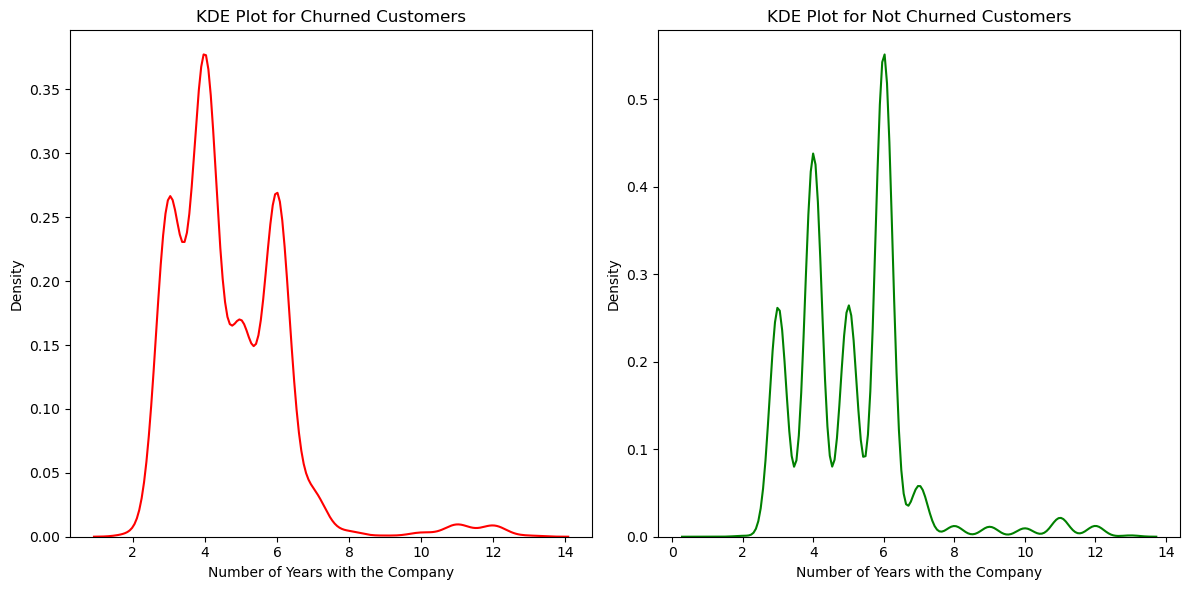

In [ ]:
#Lets see the customer lifetime distribution in some other ways
#Using a KDE plot
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for churned and not churned customers
churned_customers = client_data[client_data['churn'] == 1]
not_churned_customers = client_data[client_data['churn'] == 0]

plt.figure(figsize=(12, 6))

# KDE Plot for churned customers
plt.subplot(1, 2, 1)
sns.kdeplot(data=churned_customers, x='num_years_antig', color='red')
plt.title('KDE Plot for Churned Customers')
plt.xlabel('Number of Years with the Company')
plt.ylabel('Density')

# KDE Plot for not churned customers
plt.subplot(1, 2, 2)
sns.kdeplot(data=not_churned_customers, x='num_years_antig', color='green')
plt.title('KDE Plot for Not Churned Customers')
plt.xlabel('Number of Years with the Company')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


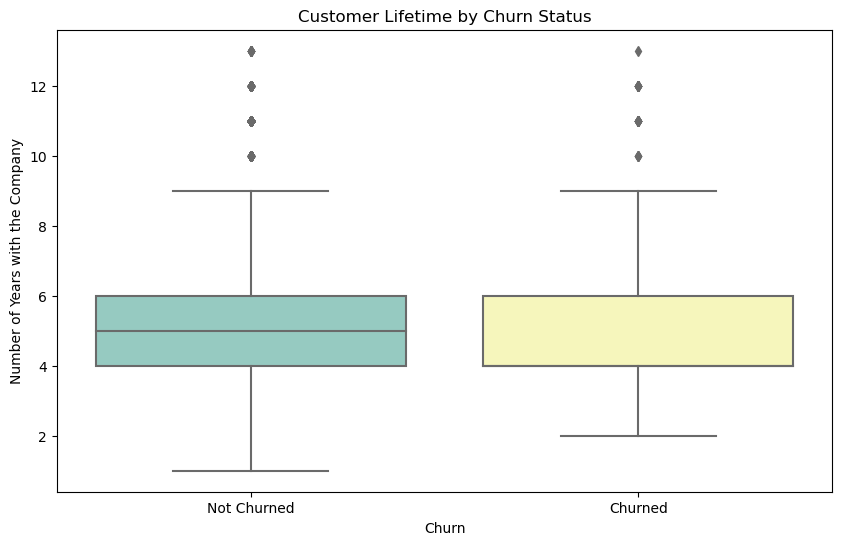

In [ ]:
#using a box plot.

plt.figure(figsize=(10, 6))
sns.boxplot(data=client_data, x='churn', y='num_years_antig', palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Number of Years with the Company')
plt.title('Customer Lifetime by Churn Status')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


The visual analysis of churn data shows the presence of outliers 

here are some insights gathered from the analysis of customer churn status

* 9.3% of the customers churned 

In [ ]:
#distribution of predictor variable by outcome
continuous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create box plots to compare the distribution of continuous features for each outcome category
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.set(style="whitegrid")
colors = ['darkred', 'darkblue']
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette=colors)
    plt.xlabel('Outcome')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

#### SALES CHANNELS ANALYSIS

In [44]:
channel = pd.DataFrame(client_data.groupby(['channel_sales'])['churn'].value_counts(normalize=True)*100)
channel.columns = ['Company base (%)']
channel = channel.reset_index()
channel['churn'] = channel['churn'].map({0:'Retention',1:'Churn'})
channel.sort_values('Company base (%)',inplace=True,ascending=False)
colors = ['#FF5733', '#33FF57']  # Define your desired colors here


fig = px.bar(channel, x="channel_sales", y="Company base (%)", color="churn", title="Channel sales",color_discrete_sequence=colors,template='ggplot2')
fig.show()

channel


,channel_sales,churn,Company base (%)
0,epumfxlbckeskwekxbiuasklxalciiuu,Retention,100.000000
3,fixdbufsefwooaasfcxdxadsiekoceaa,Retention,100.000000
8,sddiedcslfslkckwlfkdpoeeailfpeds,Retention,100.000000
6,lmkebamcaaclubfxadlmueccxoimlema,Retention,94.411286
1,ewpakwlliwisiwduibdlfmalxowmwpci,Retention,91.601344
9,usilxuppasemubllopkaafesmlibmsdf,Retention,89.963636
4,foosdfpfkusacimwkcsosbicdxkicaua,Retention,87.859046
5,foosdfpfkusacimwkcsosbicdxkicaua,Churn,12.140954
10,usilxuppasemubllopkaafesmlibmsdf,Churn,10.036364
2,ewpakwlliwisiwduibdlfmalxowmwpci,Churn,8.398656


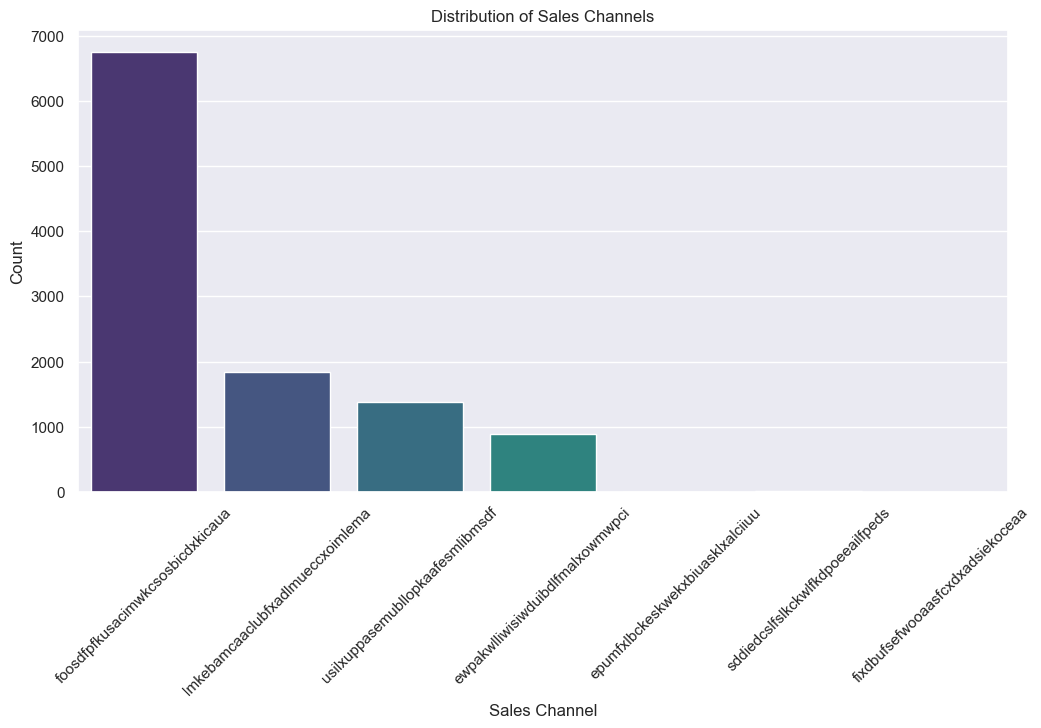

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=client_data, x='channel_sales', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Distribution of Sales Channels')
plt.show()


#### Analysis of energy Consumption

In [ ]:
consumption = client_data[['cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]
consumption['churn'] = consumption['churn'].map({0:'Retention',1:'Churn'})
for i in consumption.columns[:-2]:
    fig = px.histogram(consumption,x=i,color_discrete_sequence=colors,template='ggplot2',nbins=100,color='churn')
    fig.show()

These distributions are highly skewed, shows there are several outliers and the dataset might be imbalanced.

#### Analysis of dates

In [ ]:
dates = client_data[['date_activ','date_end','date_modif_prod','date_renewal','churn']]
#Convert to datetime
dates['date_activ'] = pd.to_datetime(dates['date_activ'])
dates['date_end'] = pd.to_datetime(dates['date_end'])
dates['date_modif_prod'] = pd.to_datetime(dates['date_modif_prod'])
dates['date_renewal'] = pd.to_datetime(dates['date_renewal'])

dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_activ       14606 non-null  datetime64[ns]
 1   date_end         14606 non-null  datetime64[ns]
 2   date_modif_prod  14606 non-null  datetime64[ns]
 3   date_renewal     14606 non-null  datetime64[ns]
 4   churn            14606 non-null  int64         
dtypes: datetime64[ns](4), int64(1)
memory usage: 570.7 KB


In [ ]:
for date in dates.columns[:-1]:
    temp = pd.DataFrame(dates.groupby([date])['churn'].value_counts())
    temp.columns = ['Number of companies']
    temp = temp.reset_index()
    temp['churn'] = temp['churn'].map({0:'Retention',1:'Churn'})
    
    fig = px.line(temp,x=date,y='Number of companies',color_discrete_sequence=colors,template='ggplot2',color='churn')
    fig.show()

Analysis of forecast

In [56]:
import pandas as pd
import plotly.express as px

# Replace these column names with your own forecast columns
forecast_columns = [
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak',
]

# Create a DataFrame with your forecast columns and 'churn'
forecast = client_data[forecast_columns + ['churn']]

# Map 'churn' values to 'Retention' and 'Churn'
forecast['churn'] = forecast['churn'].map({0: 'Retention', 1: 'Churn'})

# Define color palette
colors = ['#FF5733', '#33FF57'] 

# Create histograms for each forecast column
for column in forecast_columns:
    fig = px.histogram(
        forecast,
        x=column,
        nbins=100,
        color='churn',
        color_discrete_sequence=colors,
        template='ggplot2',
        title=f'Histogram of {column} by Churn',
    )
    fig.show()


A lot of the forecast variables are highlt skewed

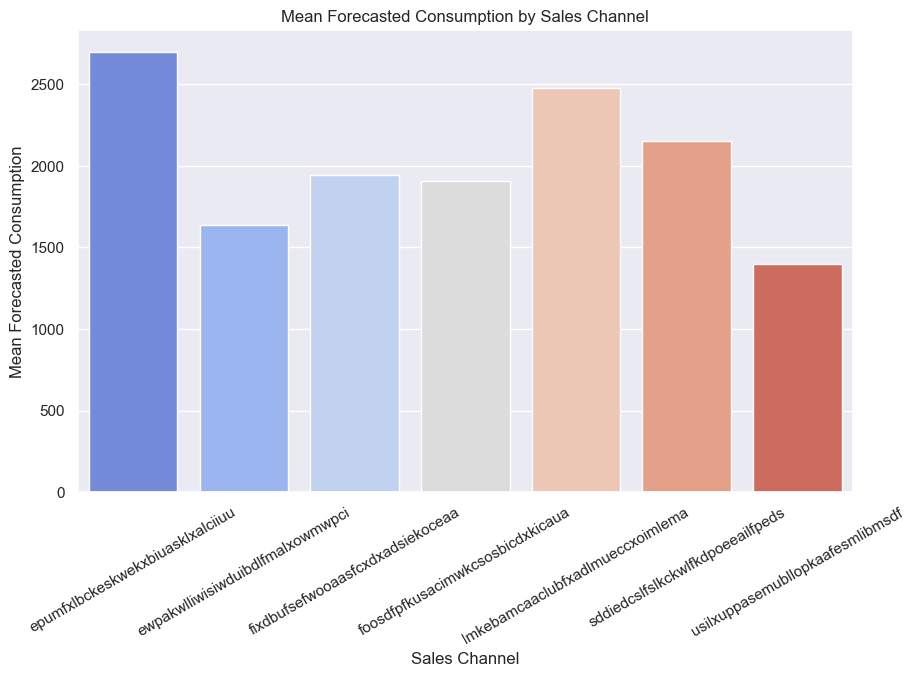

In [54]:
# Grouping by Sales Channel
channel_grouped = client_data.groupby('channel_sales')

# Calculating Mean Forecasted Consumption for Each Sales Channel
mean_forecast_consumption = channel_grouped['forecast_cons_12m'].mean().reset_index()

# Bar Plot to Compare Mean Forecasted Consumption by Sales Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_forecast_consumption, x='channel_sales', y='forecast_cons_12m', palette='coolwarm')
plt.title('Mean Forecasted Consumption by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Mean Forecasted Consumption')
plt.xticks(rotation=30)
plt.show()

### DATA CLEANING

## Missing data in clients file

In [49]:
missing_col = pd.DataFrame(client_data.isnull().sum()/len(client_data)*100)
missing_col.columns = ['Variables']
fig = px.bar(missing_col,y='Variables',color_discrete_sequence=colors,template='ggplot2',\
    labels=dict(index='Variables',Variables='Missing values (%)'))
fig.show()

In [ ]:
missing_col = pd.DataFrame(price_data.isnull().sum()/len(price_data)*100)
missing_col.columns = ['Variables']
fig = px.bar(missing_col,y='Variables',color_discrete_sequence=colors,template='ggplot2',\
    labels=dict(index='Variables',Variables='Missing values (%)'))
fig.show()

In [ ]:
missing_channel_sales = client_data[client_data['channel_sales'] == 'MISSING']
missing_channel_sales


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
14,c5037389dd8be351d3c40f2973da2391,MISSING,9707,0,0,2010-12-01,2016-12-01,2010-12-01,2015-12-02,1028.52,0,0.0,15.37,0.168242,0.089602,45.308378,f,0.00,15.78,15.78,1,111.59,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
16,bd14bbac3aca710ee5288fcd8511d4bb,MISSING,786536,80583,85883,2010-02-15,2016-02-15,2010-02-15,2015-02-16,13517.50,23298,0.0,16.60,0.164058,0.086163,44.311378,t,2585.38,25.68,25.68,2,1087.76,6,lxidpiddsbxsbosboudacockeimpuepw,11.400,0
18,f2b93783adecf0d0d8d60ab547bda3de,MISSING,24838,0,2877,2011-05-27,2016-05-27,2011-05-27,2015-05-31,1088.35,798,0.0,141.79,0.115174,0.098837,40.606701,f,79.36,21.57,21.57,1,117.44,5,ldkssxwpmemidmecebumciepifcamkci,15.001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,cf8fdee748705aacc79b92eca825218f,MISSING,1185,0,0,2009-06-08,2016-06-08,2009-06-08,2015-06-12,176.56,0,0.0,7.59,0.144902,0.000000,44.311378,f,0.00,21.52,21.52,1,16.13,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0
14594,9c93ea61edcaddf27333bc25178e760f,MISSING,6694,0,0,2011-12-01,2016-12-01,2015-11-01,2015-12-02,1007.35,0,0.0,15.98,0.144039,0.000000,45.308378,f,0.00,15.78,15.78,1,86.54,4,ldkssxwpmemidmecebumciepifcamkci,13.856,0
14595,a6096551a64c47cd240c356b0669f892,MISSING,11563,0,0,2010-02-08,2016-02-08,2015-12-16,2015-02-09,1384.83,0,0.0,16.16,0.164641,0.086742,44.311378,f,0.00,31.20,31.20,1,122.35,6,ldkssxwpmemidmecebumciepifcamkci,13.856,0
14598,1582ef35fbfa265e60bb3399bdebac87,MISSING,9441,0,480,2009-10-08,2016-10-08,2015-05-24,2015-10-09,983.97,480,0.0,132.11,0.115237,0.100123,40.939027,f,46.98,20.00,20.00,1,113.17,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0


In [ ]:
client_data.head(20)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,0.0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,0.0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0
